In [1]:
import tensorflow as tf
import numpy as np
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import sys, getopt
from keras import backend as K
import glob
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
path = r'D:\data\sale in csv\sales20-23' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)


In [3]:
df['Total_Amt'] = (df['RSP'] * df['Bill_Qty']) - (df['Discount_Amt'])

In [5]:
# splitting dataframe by Store location
# grouping by particular dataframe column
grouped = df.groupby(df.Store)
df1_CHOWRINGHEE = grouped.get_group("CITIMART - CHOWRINGHEE")
df1_NEWMARKET = grouped.get_group("CITIMART - NEW MARKET")
df1_HATIBAGAN = grouped.get_group("CITIMART - HATIBAGAN")
df1_GARIAHAT = grouped.get_group("CITIMART - GARIAHAT")

df_CHOWRINGHEE = df1_CHOWRINGHEE.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
df_NEWMARKET = df1_NEWMARKET.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
df_HATIBAGAN = df1_HATIBAGAN.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
df_GARIAHAT = df1_GARIAHAT.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]


In [678]:
#STORE-CHOWRINGHEE
#grouped_chowringhee = df_CHOWRINGHEE.groupby(df_CHOWRINGHEE.DEPARTMENT)
#grouped_chowringhee = df_NEWMARKET.groupby(df_NEWMARKET.DEPARTMENT)
grouped_chowringhee = df_HATIBAGAN.groupby(df_HATIBAGAN.DEPARTMENT)

#MEN
df_CHOWRINGHEE_TshirtM = grouped_chowringhee.get_group('T-Shirts (M)')
df_CHOWRINGHEE_JeansM = grouped_chowringhee.get_group('Jeans (M)')
df_CHOWRINGHEE_FormalshirtM = grouped_chowringhee.get_group('Formal Shirts (M)')
df_CHOWRINGHEE_CasualshirtM = grouped_chowringhee.get_group('Casual Shirts (M)')
df_CHOWRINGHEE_CasualtrouserM = grouped_chowringhee.get_group('Casual Trouser (M)')
df_CHOWRINGHEE_BermundasM = grouped_chowringhee.get_group('Bermudas (M)')
df_CHOWRINGHEE_JacketM = grouped_chowringhee.get_group('Jacket (M)')
df_CHOWRINGHEE_PulloverM = grouped_chowringhee.get_group('Pullover (M)')
df_CHOWRINGHEE_PyajamaM = grouped_chowringhee.get_group('Pyajama (M)')
df_CHOWRINGHEE_FormaltrouserM = grouped_chowringhee.get_group('Formal Trouser (M)')
df_CHOWRINGHEE_LingeriesM = grouped_chowringhee.get_group('Lingeries (M)')
df_CHOWRINGHEE_SweaterstM = grouped_chowringhee.get_group('Sweaters (M)')
df_CHOWRINGHEE_BlazerM = grouped_chowringhee.get_group('Blazer (M)')

#LADIES
df_CHOWRINGHEE_KurtiL = grouped_chowringhee.get_group('Kurti (L)')
df_CHOWRINGHEE_JeansL = grouped_chowringhee.get_group('Jeans (L)')
df_CHOWRINGHEE_TopL = grouped_chowringhee.get_group('Top (L)')
df_CHOWRINGHEE_SalwarsuitL = grouped_chowringhee.get_group('Salwar Suit (L)')
df_CHOWRINGHEE_TshirtL = grouped_chowringhee.get_group('T-Shirt (L)')
df_CHOWRINGHEE_ShirtL = grouped_chowringhee.get_group('Shirt (L)')
df_CHOWRINGHEE_PlazoL = grouped_chowringhee.get_group('Plazo (L)')
df_CHOWRINGHEE_TrousersL = grouped_chowringhee.get_group('Trousers (L)')
df_CHOWRINGHEE_SweatersL = grouped_chowringhee.get_group('Sweaters (L)')
#df_CHOWRINGHEE_DressesL = grouped_chowringhee.get_group('Dress (L)')
df_CHOWRINGHEE_SkirtsL = grouped_chowringhee.get_group('Skirts (L)')
df_CHOWRINGHEE_PulloverL = grouped_chowringhee.get_group('Pullover (L)')
df_CHOWRINGHEE_JacketL = grouped_chowringhee.get_group('Jacket (L)')
df_CHOWRINGHEE_NightyL = grouped_chowringhee.get_group('Nighty (L)')
df_CHOWRINGHEE_HalfpantL = grouped_chowringhee.get_group('Half Pant (L)')
df_CHOWRINGHEE_LeggingsL = grouped_chowringhee.get_group('Leggings (L)')
df_CHOWRINGHEE_LachaL = grouped_chowringhee.get_group('Lacha (L)')
df_CHOWRINGHEE_CapriL = grouped_chowringhee.get_group('Capri (L)')
df_CHOWRINGHEE_ParallelL = grouped_chowringhee.get_group('Parallel (L)')
df_CHOWRINGHEE_TunicL = grouped_chowringhee.get_group('Tunic (L)')
df_CHOWRINGHEE_StoleL = grouped_chowringhee.get_group('Stole (L)')
df_CHOWRINGHEE_SareeCotton = grouped_chowringhee.get_group('Cotton')
df_CHOWRINGHEE_SareeTant = grouped_chowringhee.get_group('Tant')
df_CHOWRINGHEE_SareeSynthetics = grouped_chowringhee.get_group('Synthetics')
df_CHOWRINGHEE_SareeEmbroidery = grouped_chowringhee.get_group('Embroidery')
df_CHOWRINGHEE_SareePremiume = grouped_chowringhee.get_group('Premiume')
df_CHOWRINGHEE_Fancy = grouped_chowringhee.get_group('Fancy')

#GIRLS
df_CHOWRINGHEE_FrockG = grouped_chowringhee.get_group('Frock (G)')
df_CHOWRINGHEE_TopG = grouped_chowringhee.get_group('Top (G)')
df_CHOWRINGHEE_CaprisetG = grouped_chowringhee.get_group('Capri Set (G)')
df_CHOWRINGHEE_JeansG = grouped_chowringhee.get_group('Jeans (G)')
df_CHOWRINGHEE_TshirtG = grouped_chowringhee.get_group('T-Shirt (G)')
df_CHOWRINGHEE_HalfpantG = grouped_chowringhee.get_group('Half Pant (G)')
df_CHOWRINGHEE_SkirttopsetG = grouped_chowringhee.get_group('Skirt Top Set (G)')
df_CHOWRINGHEE_CapriG = grouped_chowringhee.get_group('Capri (G)')
df_CHOWRINGHEE_HalfPantSetG = grouped_chowringhee.get_group('Half Pant Set (G)')
df_CHOWRINGHEE_SkirtsG = grouped_chowringhee.get_group('Skirts (G)')
df_CHOWRINGHEE_PulloverG = grouped_chowringhee.get_group('Pullover (G)')
df_CHOWRINGHEE_SweaterG = grouped_chowringhee.get_group('Sweater (G)')
df_CHOWRINGHEE_Plazo = grouped_chowringhee.get_group('Plazo (G)')
df_CHOWRINGHEE_JacketG = grouped_chowringhee.get_group('Jacket (G)')
df_CHOWRINGHEE_JeggingsG = grouped_chowringhee.get_group('Jeggings (G)')

#BOYS
df_CHOWRINGHEE_TshirtB = grouped_chowringhee.get_group('T-Shirt (B)')
df_CHOWRINGHEE_BabasuitB = grouped_chowringhee.get_group('Baba Suit (B)')
df_CHOWRINGHEE_ShirtB = grouped_chowringhee.get_group('Shirt (B)')
df_CHOWRINGHEE_JeansB = grouped_chowringhee.get_group('Jeans (B)')
df_CHOWRINGHEE_TrouserB = grouped_chowringhee.get_group('Trouser (B)')
df_CHOWRINGHEE_CapriB = grouped_chowringhee.get_group('Capri (B)')
df_CHOWRINGHEE_HalfpantB = grouped_chowringhee.get_group('Half Pant (B)')
df_CHOWRINGHEE_PulloverB = grouped_chowringhee.get_group('Pullover (B)')
df_CHOWRINGHEE_JacketB = grouped_chowringhee.get_group('Jacket (B)')

#OTHERS
df_CHOWRINGHEE_Dressmaterial = grouped_chowringhee.get_group('Dress Material')

df_CHOWRINGHEE_Bedsheets = grouped_chowringhee.get_group('Bed Sheets')
df_CHOWRINGHEE_Sweets = grouped_chowringhee.get_group('Sweets')
df_CHOWRINGHEE_Deo = grouped_chowringhee.get_group('Deo')
#df_CHOWRINGHEE_Whiskey = grouped_chowringhee.get_group('Whisky')
df_CHOWRINGHEE_Towel = grouped_chowringhee.get_group('Towel')
df_CHOWRINGHEE_Chappal = grouped_chowringhee.get_group('Chappal')
df_CHOWRINGHEE_Kashmiriswals = grouped_chowringhee.get_group('Kashmiri Swals')
df_CHOWRINGHEE_Novelties = grouped_chowringhee.get_group('Novelties')
df_CHOWRINGHEE_sportsshoe = grouped_chowringhee.get_group('Sports Shoe')
df_CHOWRINGHEE_Hairshampoo = grouped_chowringhee.get_group('Hair Shampoo')
df_CHOWRINGHEE_Perfumes = grouped_chowringhee.get_group('Perfumes')
df_CHOWRINGHEE_Stationary = grouped_chowringhee.get_group('Stationary')

df_CHOWRINGHEE_Facewash = grouped_chowringhee.get_group('Facewash')
df_CHOWRINGHEE_TrollyBag = grouped_chowringhee.get_group('Trolly Bag')
df_CHOWRINGHEE_Shoe = grouped_chowringhee.get_group('Shoe')
df_CHOWRINGHEE_Toys = grouped_chowringhee.get_group('Toys')
df_CHOWRINGHEE_Bag = grouped_chowringhee.get_group('Bag')

df_CHOWRINGHEE_FridgeBottle = grouped_chowringhee.get_group('Fridge Bottle')
df_CHOWRINGHEE_Blankets = grouped_chowringhee.get_group('Blankets')
df_CHOWRINGHEE_Imitation = grouped_chowringhee.get_group('Imitation')
#df_CHOWRINGHEE_LipSticks = grouped_chowringhee.get_group('Lip Sticks')
df_CHOWRINGHEE_SkinCream = grouped_chowringhee.get_group('Skin Cream')
df_CHOWRINGHEE_Soap = grouped_chowringhee.get_group('Soap')
df_CHOWRINGHEE_Other = grouped_chowringhee.get_group('Other')
df_CHOWRINGHEE_BabyAccessory = grouped_chowringhee.get_group('Baby Accessory')
df_CHOWRINGHEE_LiquidConcentrates = grouped_chowringhee.get_group('Liquid Concentrates')
#df_CHOWRINGHEE_Foundation = grouped_chowringhee.get_group('Foundation')
df_CHOWRINGHEE_Bra = grouped_chowringhee.get_group('Bra')
df_CHOWRINGHEE_Confectionery = grouped_chowringhee.get_group('CONFECTIONERY')
df_CHOWRINGHEE_Belt = grouped_chowringhee.get_group('Belt')
df_CHOWRINGHEE_DryFlower = grouped_chowringhee.get_group('Dry Flower')
df_CHOWRINGHEE_Sandal = grouped_chowringhee.get_group('Sandal')
df_CHOWRINGHEE_Curtains = grouped_chowringhee.get_group('Curtains')
#df_CHOWRINGHEE_LipColour = grouped_chowringhee.get_group('Lip Colour')
df_CHOWRINGHEE_Container = grouped_chowringhee.get_group('Container')
df_CHOWRINGHEE_SchoolBag = grouped_chowringhee.get_group('School Bag')



#Kids
#df_CHOWRINGHEE_BombabyK = grouped_chowringhee.get_group('Bom Baby (K)')
df_CHOWRINGHEE_TshirtRm = grouped_chowringhee.get_group('T-Shirts (Rm)')

#FOOD
df_CHOWRINGHEE_InstantNoodles = grouped_chowringhee.get_group('INSTANT NOODLES')
df_CHOWRINGHEE_Sauces = grouped_chowringhee.get_group('Sauces')
df_CHOWRINGHEE_CtcTea = grouped_chowringhee.get_group('Ctc Tea')
df_CHOWRINGHEE_FruitBasedJuices = grouped_chowringhee.get_group('Fruit Based Juices')
df_CHOWRINGHEE_Pickles = grouped_chowringhee.get_group('Pickles')
df_CHOWRINGHEE_SugarBoilesChocolates = grouped_chowringhee.get_group('Sugar Boiled Chocolates')
df_CHOWRINGHEE_NINamkeens = grouped_chowringhee.get_group('N.I.Namkeens')
df_CHOWRINGHEE_Jams = grouped_chowringhee.get_group('Jams')
df_CHOWRINGHEE_ChineseNoodles = grouped_chowringhee.get_group('CHINESE NOODLES')
df_CHOWRINGHEE_Cookies = grouped_chowringhee.get_group('Cookies')


In [679]:
df1 = df_CHOWRINGHEE_Fancy.loc[:, ['Bill_Date', 'RSP', 'Bill_Qty', 'Total_Amt']]
df1_sort = df1.sort_values('Bill_Date', ascending=True)

In [680]:
df1['Bill_Date'] = pd.to_datetime(df1['Bill_Date'], format='%Y-%m-%d')
df1_sort = df1.sort_values('Bill_Date', ascending=True)
df1_sort

,Bill_Date,RSP,Bill_Qty,Total_Amt
63373,2020-01-05,799.0,1.0,799.0
64150,2020-01-06,749.0,1.0,524.3
63173,2020-01-06,449.0,1.0,449.0
63455,2020-01-06,799.0,1.0,799.0
63454,2020-01-06,749.0,1.0,749.0
...,...,...,...,...
4408007,2023-11-13,649.0,1.0,649.0
4408802,2023-11-21,299.0,1.0,299.0
4956205,2023-11-21,299.0,1.0,299.0
4962364,2023-11-25,649.0,1.0,454.3


In [681]:
# first create a DataFrame with all dates between specified start<-->end using pd.date_range()
all_dates = pd.DataFrame(pd.date_range(df1_sort['Bill_Date'].min(), df1_sort['Bill_Date'].max()), columns=['Bill_Date'])

# from the all_dates DataFrame, left join onto the DataFrame with missing dates
new_df = all_dates.merge(right=df1_sort, how='left', on='Bill_Date')
print(len(pd.unique(new_df['Bill_Date'])))
new_df.tail(15)
new_df.isnull().sum()

1434


Bill_Date      0
RSP          919
Bill_Qty     919
Total_Amt    919
dtype: int64

In [682]:
df_a = new_df.groupby('Bill_Date').agg(Total_Qty=('Bill_Qty', 'sum'),
                            RSP_AVG=('RSP', 'mean'),
                            Total_Amt=('Total_Amt', 'sum')).reset_index().rename(columns={'Bill_Date': 'Bill_Date'})
df_a


,Bill_Date,Total_Qty,RSP_AVG,Total_Amt
0,2020-01-05,1.0,799.0,799.0
1,2020-01-06,7.0,649.0,4018.3
2,2020-01-07,0.0,NaN,0.0
3,2020-01-08,1.0,449.0,449.0
4,2020-01-09,0.0,774.0,50.0
...,...,...,...,...
1429,2023-12-04,0.0,NaN,0.0
1430,2023-12-05,0.0,NaN,0.0
1431,2023-12-06,0.0,NaN,0.0
1432,2023-12-07,0.0,NaN,0.0


In [683]:
#Price ---> USD INR Exchange rate
#tavg ---> Daily average temperature
# set data index as datetime column
#df_ex_temp.index = pd.to_datetime(df_ex_temp.Bill_Date)
df_f = df_a.loc[:, [ 'Bill_Date', 'Total_Amt', 'Total_Qty', 'RSP_AVG']]
#train_dates = pd.to_datetime(df_f['Bill_Date'])
#print(train_dates.tail(15)) #Check last few dates. 
df_f.index = pd.to_datetime(df_f.Bill_Date)
df_f
df_daily = df_f.resample('D').agg({"Total_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean'})
df_monthly = df_f.resample('M').agg({"Total_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean'})


In [685]:
# check number of nan values in dataframe
df_daily.isna().sum()

Total_Amt      0
Total_Qty      0
RSP_AVG      919
dtype: int64

In [686]:
df_daily.mean()

# fill the nan values by upper row value
df_daily = df_daily.fillna(df_daily.mean())
df_daily.tail()
df_daily['Total_Amt'] = df_daily['Total_Amt'].fillna((df_daily['Total_Amt'].mean()))
df_daily
opn = df_daily[['Total_Amt']]

<Axes: xlabel='Bill_Date'>

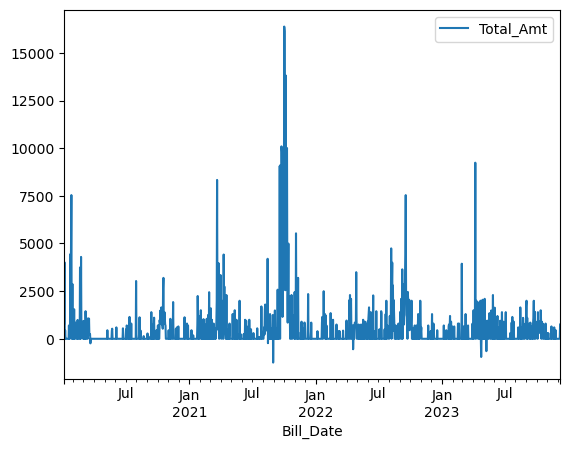

In [687]:
opn.plot()

In [688]:
ds = opn.values

In [689]:
ds

array([[ 799. ],
       [4018.3],
       [   0. ],
       ...,
       [   0. ],
       [   0. ],
       [ 749. ]])

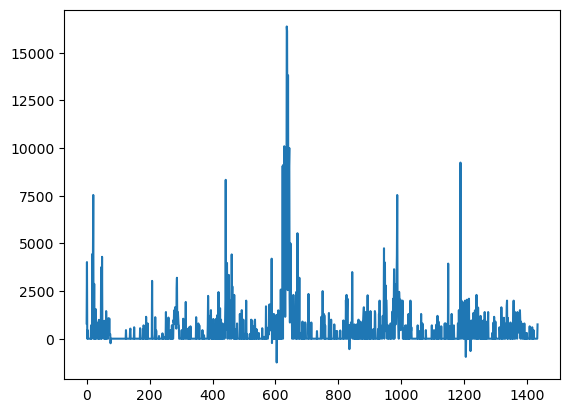

In [690]:
plt.plot(ds)

In [691]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [692]:
len(ds_scaled), len(ds)

(1434, 1434)

In [693]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [694]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [695]:
train_size,test_size

(1003, 431)

In [696]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [697]:
#Taking 100 days price as one record for training
time_stamp = 15
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [698]:
X_train.shape,y_train.shape

((987, 15), (987,))

In [699]:
X_test.shape, y_test.shape

((415, 15), (415,))

In [700]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [701]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 15, 50)            10400     
                                                                 
 lstm_46 (LSTM)              (None, 15, 50)            20200     
                                                                 
 lstm_47 (LSTM)              (None, 50)                20200     
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [702]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=32)

Epoch 1/15
31/31 [==============================] - 8s 70ms/step - loss: 0.0067 - val_loss: 0.0015
Epoch 2/15
31/31 [==============================] - 1s 31ms/step - loss: 0.0055 - val_loss: 0.0015
Epoch 3/15
31/31 [==============================] - 1s 38ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 4/15
31/31 [==============================] - 1s 25ms/step - loss: 0.0052 - val_loss: 0.0017
Epoch 5/15
31/31 [==============================] - 1s 37ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 6/15
31/31 [==============================] - 1s 34ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 7/15
31/31 [==============================] - 1s 40ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 8/15
31/31 [==============================] - 1s 21ms/step - loss: 0.0047 - val_loss: 0.0015
Epoch 9/15
31/31 [==============================] - 1s 21ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 10/15
31/31 [==============================] - 1s 21ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 11/

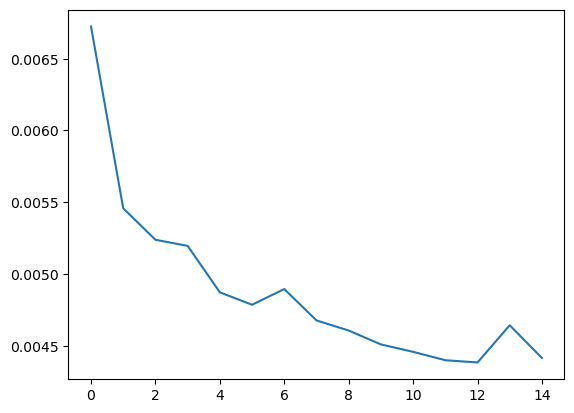

In [703]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [704]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


13/13 [==============================] - 0s 10ms/step


In [705]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

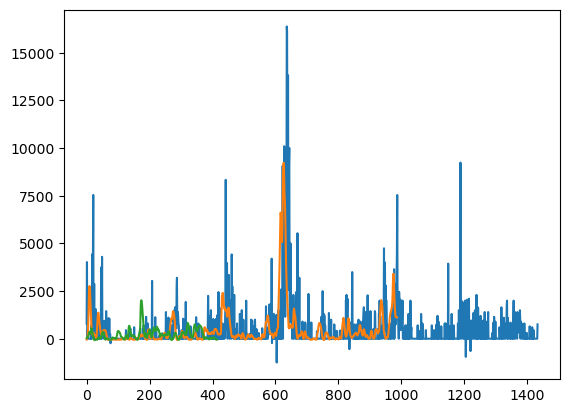

In [706]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [707]:
type(train_predict)

numpy.ndarray

In [708]:
test = np.vstack((train_predict,test_predict))

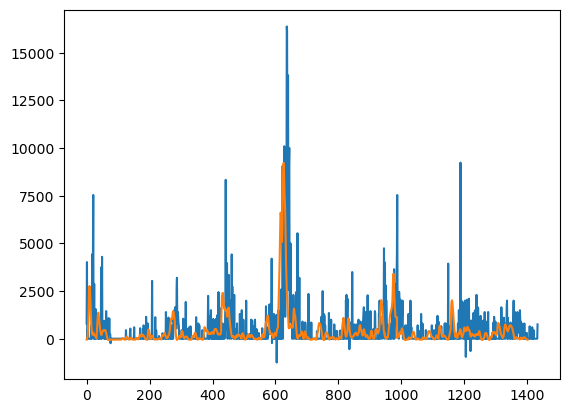

In [709]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [710]:
l= len(ds_test)
print(l)

431


In [711]:
#Getting the last 100 days records
fut_inp = ds_test[(l-100):]

fut_inp = fut_inp.reshape(1,-1)

tmp_inp = list(fut_inp)

fut_inp.shape

#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()



In [712]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.07187893986701965], [0.07461600750684738], [0.07644370198249817], [0.07733853161334991], [0.07755620032548904], [0.0773686096072197], [0.07697568088769913], [0.07649847865104675], [0.07599974423646927], [0.07550705969333649], [0.07502993196249008], [0.07457008957862854], [0.0741267204284668], [0.07369854301214218], [0.07328446209430695], [0.07288360595703125], [0.07249516993761063], [0.07211828231811523], [0.07175210118293762], [0.07139567285776138], [0.0710480809211731], [0.07070843130350113], [0.07037587463855743], [0.07004973292350769], [0.06972934305667877], [0.06941419094800949], [0.06910384446382523], [0.06879795342683792], [0.06849627941846848], [0.06819860637187958]]


In [713]:
m = len(ds_scaled)
print(m)

1434


In [714]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

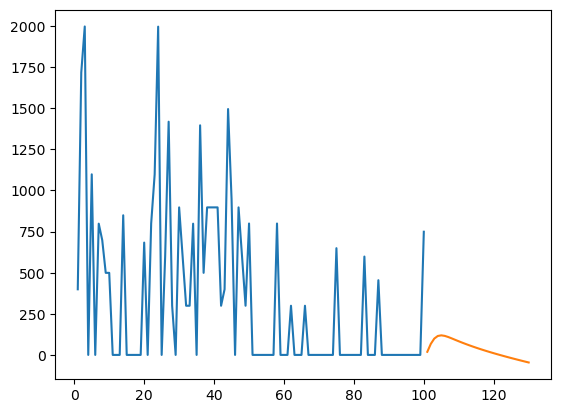

In [715]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[(m-100):]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [716]:
ds_new = ds_scaled.tolist()

In [717]:
p = len(ds_new)
print(p)

1434


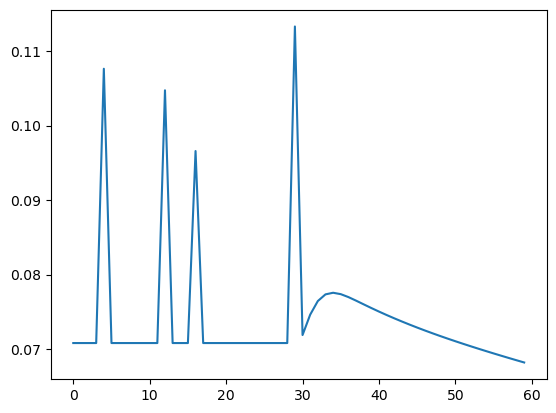

In [718]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[(p-30):])

In [719]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

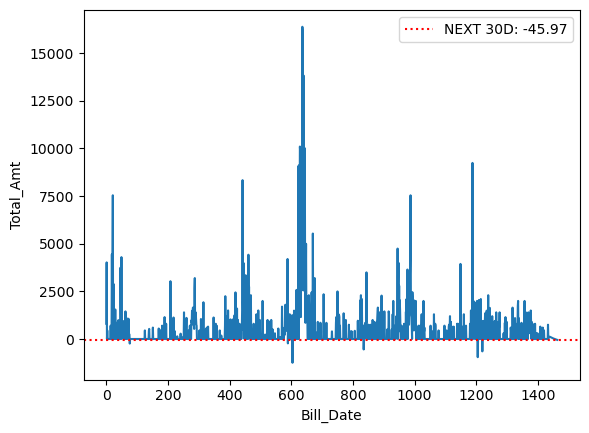

In [720]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Total_Amt")
plt.xlabel("Bill_Date")
#plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [721]:
Output = normalizer.inverse_transform(lst_output)
Output

array([[ 18.91070355],
       [ 67.16082673],
       [ 99.38015603],
       [115.15457069],
       [118.99172182],
       [115.6847976 ],
       [108.75809296],
       [100.34578105],
       [ 91.5538913 ],
       [ 82.8686511 ],
       [ 74.45765261],
       [ 66.35136713],
       [ 58.5354784 ],
       [ 50.98739564],
       [ 43.68781158],
       [ 36.62135925],
       [ 29.77385373],
       [ 23.12992802],
       [ 16.67474049],
       [ 10.39147941],
       [  4.26398971],
       [ -1.72348961],
       [ -7.58593152],
       [-13.33528813],
       [-18.98324886],
       [-24.53887629],
       [-30.00978825],
       [-35.40215781],
       [-40.7201879 ],
       [-45.96768743]])

In [722]:
sum1 = Output.sum()
print(sum1)

1115.417592984442


In [723]:
sum2 = sum1 + ((.10) * sum1 )
print(sum2)

1226.9593522828864
